# Regression

In [2]:
# Importing the libraries we will use
import numpy
import urllib.request
import scipy.optimize
import random
from sklearn.model_selection import train_test_split

In [3]:
# Code to get raw JSON data from the end point and dump it into a Python list
def parseData(fname):
  for l in urllib.request.urlopen(fname):
    yield eval(l)

print ("Reading data...")
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print ("done")

Reading data...
done


In [4]:
# Understand what our data looks like before operating on it
data[0]

{'beer/ABV': 5.0,
 'beer/beerId': '47986',
 'beer/brewerId': '10325',
 'beer/name': 'Sausa Weizen',
 'beer/style': 'Hefeweizen',
 'review/appearance': 2.5,
 'review/aroma': 2.0,
 'review/overall': 1.5,
 'review/palate': 1.5,
 'review/taste': 1.5,
 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.',
 'review/timeStruct': {'hour': 20,
  'isdst': 0,
  'mday': 16,
  'min': 57,
  'mon': 2,
  'sec': 3,
  'wday': 0,
  'yday': 47,
  'year': 2009},
 'review/timeUnix': 1234817823,
 'user/profileName': 'stcules'}

In [5]:
# How many samples are there in the data? How many features are we looking at?
print (len(data[0]))
print (len(data))

14
50000


In [6]:
### Do older people rate beer more highly? ### -> This is the question we would like to answer
# Note that we can even answer this question by plotting a graph, but here we would like to make predictions.
# We try to predict the rating a user would give to a beer, given the user's age in seconds

# Not all users may submit their age. Drop rows where we don't have age
data2 = [d for d in data if 'user/ageInSeconds' in d]

# Generate a feature matrix of size (no of samples x 2)
# 1 is added to add the bias term to this matrix
def feature(datum):
   feat = [1]
   feat.append(datum['user/ageInSeconds'])
   return feat

X = [feature(d) for d in data2]
y = [d['review/overall'] for d in data2] # this is the list of overall ratings

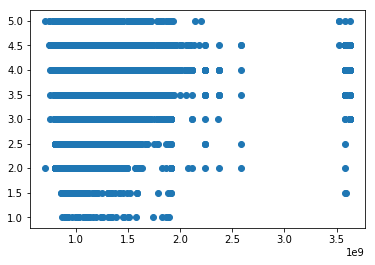

In [7]:
# Plotting the values onto a graph
import matplotlib.pyplot as plt

# Plot the points using matplotlib
x = [d[1] for d in X]
plt.scatter(x, y)
plt.show() 

The plot shows us that the age and rating values have no relation in particular. 

Least Square Regression

In [8]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# Least squares regression
theta,residuals,rank,s = numpy.linalg.lstsq(X_train, y_train)

In [9]:
# Make predictions on the test data
predictions = numpy.dot(X_test, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = numpy.dot(X_train, theta)

In [10]:
# MSE calculation
from sklearn.metrics import mean_squared_error
print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

0.497207232319
0.483014162462


In [11]:
# R2 Score calculation
from sklearn.metrics import r2_score

print (r2_score(y_train, y_true_pred))
print (r2_score(y_test, predictions))

0.00393919704717
-0.000602562649


In [ ]:
# MAE calculation
from sklearn.metrics import mean_absolute_error

print (mean_absolute_error(y_train, y_true_pred))
print (mean_absolute_error(y_test, predictions))

Ridge Regression

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge(fit_intercept=True, random_state=0, normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=0, solver='auto', tol=0.001)

In [13]:
predictions = ridge.predict(X_test)
y_true_pred = ridge.predict(X_train)

In [14]:
# MSE calculation
from sklearn.metrics import mean_squared_error
print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

# All other evaluators can be applied in a similar manner

0.496850221396
0.483491715628
